In [2]:
import pandas as pd

图像分类（10类：0-9）
图片的大小（28x28x1）
单个像素的值越大，表明越暗 （0-255）

    000 001 002 003 ... 026 027
    028 029 030 031 ... 054 055
    056 057 058 059 ... 082 083
    |   |   |   |  ...  |   |
    728 729 730 731 ... 754 755
    756 757 758 759 ... 782 783 

In [3]:
df_train = pd.read_csv("/wx/Models_WX/DataSets/digit_recognizer/train.csv")
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(df_train.shape)

(42000, 785)


In [6]:
df_temp = df_train.drop(columns = df_train.columns[0],axis=1)
print(df_temp.shape)


(42000, 784)


In [4]:
print(28*28)

784


In [19]:
X_train = df_train.iloc[:,1:]
print(X_train.shape)
print(X_train.head(0))


(42000, 784)
Empty DataFrame
Columns: [pixel0, pixel1, pixel2, pixel3, pixel4, pixel5, pixel6, pixel7, pixel8, pixel9, pixel10, pixel11, pixel12, pixel13, pixel14, pixel15, pixel16, pixel17, pixel18, pixel19, pixel20, pixel21, pixel22, pixel23, pixel24, pixel25, pixel26, pixel27, pixel28, pixel29, pixel30, pixel31, pixel32, pixel33, pixel34, pixel35, pixel36, pixel37, pixel38, pixel39, pixel40, pixel41, pixel42, pixel43, pixel44, pixel45, pixel46, pixel47, pixel48, pixel49, pixel50, pixel51, pixel52, pixel53, pixel54, pixel55, pixel56, pixel57, pixel58, pixel59, pixel60, pixel61, pixel62, pixel63, pixel64, pixel65, pixel66, pixel67, pixel68, pixel69, pixel70, pixel71, pixel72, pixel73, pixel74, pixel75, pixel76, pixel77, pixel78, pixel79, pixel80, pixel81, pixel82, pixel83, pixel84, pixel85, pixel86, pixel87, pixel88, pixel89, pixel90, pixel91, pixel92, pixel93, pixel94, pixel95, pixel96, pixel97, pixel98, pixel99, ...]
Index: []

[0 rows x 784 columns]


In [13]:
y_train = df_train['label']
print(y_train.shape)
print(y_train[0],y_train[3])

(42000,)
1 4


JPEG (320, 276) RGB


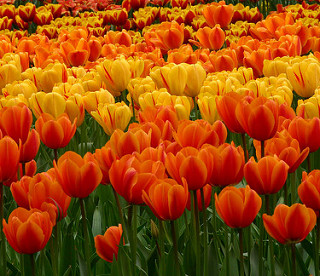

In [27]:
from PIL import Image
test_img = Image.open("/wx/Models_WX/ResNet/ResNet_34/test_examples/11746548_26b3256922_n.jpg")
print(test_img.format, test_img.size, test_img.mode)
test_img.show()

In [39]:
import numpy as np
import torch
for row_index,row in X_train.iterrows():
    np_img_flatten = np.array(row.tolist())
    np_img = np_img_flatten.reshape(28,28)
    print(np_img.shape)
    image = Image.fromarray(np.uint8(np_img))
    print(image.format, image.size, image.mode)
    image.show()
    tensor_img = torch.tensor(np_img)
    print(type(tensor_img)) 
    print(tensor_img.shape)
    print(y_train[row_index])
    break


(28, 28)
None (28, 28) L


<class 'torch.Tensor'>
torch.Size([28, 28])
1


In [32]:
np_test_img = np.array(test_img)
tensor_test_img = torch.tensor(np_test_img)
tensor_test_img.shape 

torch.Size([276, 320, 3])

依据经验，应该需要将 torch.Size([28, 28]) 升维到 torch.Size([28, 28, 1]) 

In [38]:
print(tensor_img.shape)
input_tensor_img = torch.unsqueeze(tensor_img,0)
print(input_tensor_img.shape)

torch.Size([28, 28])
torch.Size([1, 28, 28])


In [37]:
# 测试一下flatten
flatten_tensor = input_tensor_img.flatten()
print(flatten_tensor.shape)

torch.Size([784])


In [1]:
import pandas as pd
df_test = pd.read_csv("/wx/Models_WX/K-T/K_digit_recognizer/digit_recognizer/test.csv")
df_test.shape

(28000, 784)

In [2]:
df_test.shape[0]

28000

In [3]:
arr_test = df_test.values

In [4]:
print(arr_test[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  10  17  17  17
  17  81 180 180  35   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 139 253 253 253 253 253 253 253  48   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  60 228 253
 253 253 253 253 253 253 207 197  46   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 213 253 253 253 253 253 253 253 253 253 253
 223  52   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  66
 231 253 253 253 108  40  40 115 244 253 253 134   